<h1>Mid-Bootcamp project</h1>

<h2>Dataset "Ecommerce Customer Churn Analysis and Prediction"</h2>

Origin of the dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

<h2>About this dataset</h2>

The data set belongs to a leading online E-Commerce company.

An online retail company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

<h2>Columns</h2>

1. CustomerID - Unique customer ID

2. Churn - Churn Flag

3. Tenure - Tenure of customer in organization

4. PreferredLoginDevice	- Preferred login device of customer

5. CityTier	- City tier

6. WarehouseToHome - Distance in between warehouse to home of customer

7. PreferredPaymentMode	- Preferred payment method of customer

8. Gender - Gender of customer

9. HourSpendOnApp - Number of hours spend on mobile application or website

10. NumberOfDeviceRegistered - Total number of deceives is registered on particular customer

11. PreferedOrderCat - Preferred order category of customer in last month

12. SatisfactionScore - Satisfactory score of customer on service

13. MaritalStatus - Marital status of customer

14. NumberOfAddress	- Total number of addresses added on particular customer

15. Complain - Any complaint has been raised in last month

16. OrderAmountHikeFromlastYear	- Percentage increases in order from last year

17. CouponUsed	- Total number of coupon has been used in last month

18. OrderCount - Total number of orders has been places in last month

19. DaySinceLastOrder - Day Since last order by customer

20. CashbackAmount - Average cashback in last month

<h2>The Goal of the project</h2>

The company wants to know the customers who are going to churn.

<h2>Part 1. Data exploration and cleaning</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/data.csv')
pd.set_option('display.max_columns', None)
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
# Function for data cleaning

def clean_data(data):
    data_cleaned = data.copy()

# Standardizing header names: 
# 1) Converting names to lowercase and
# 2) Replacing spaces by underscores '_'

    cols = []
    for col in data_cleaned.columns:
        cols.append(col.lower().replace(' ', '_'))
    data_cleaned.columns = cols

# Deleting duplicates

    data_cleaned = data_cleaned.drop_duplicates()
    
    data_cleaned = data_cleaned.rename(columns={"customerid": "customer_id","preferredlogindevice": "preferred_login_device", "citytier": "city_tier",
       "warehousetohome": "warehouse_to_home", "preferredpaymentmode": "preferred_payment_mode", "hourspendonapp": "hour_spend_on_app",
       "numberofdeviceregistered": "number_of_device_registered", "preferedordercat": "prefered_order_category", "satisfactionscore": "satisfaction_score",
       "maritalstatus": "marital_status", "numberofaddress": "number_of_address",
       "orderamounthikefromlastyear": "order_amount_hike_from_last_year", "couponused": "coupon_used", "ordercount": "order_count",
       "daysincelastorder": "day_since_last_order", "cashbackamount": "cashback_amount"})
    
    return data_cleaned

In [5]:
data = clean_data(data)
data.head()

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_category,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [28]:
# Function for data exploration

def explore_data(data):

    # Data description and info
    data.info()
    data.describe()
    
    # Histogram of the target column
    plt.figure()
    data['churn'].hist()

    # Checking numerical and categoracal columns of the dataframe
    numerical = data.select_dtypes(np.number)
    categorical = data.select_dtypes(object)
    numerical.head()
    categorical.head()

    # Use Matplotlib to construct histograms
    plt.style.context('ggplot')    
    for column_name in numerical.columns:
        plt.figure()
        fig,ax = plt.subplots()
        ax.set_title(column_name)
        plt.hist(numerical[column_name], bins=20)
        plt.show()
    
    return data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       5630 non-null   int64  
 1   churn                             5630 non-null   int64  
 2   tenure                            5366 non-null   float64
 3   preferred_login_device            5630 non-null   object 
 4   city_tier                         5630 non-null   int64  
 5   warehouse_to_home                 5379 non-null   float64
 6   preferred_payment_mode            5630 non-null   object 
 7   gender                            5630 non-null   object 
 8   hour_spend_on_app                 5375 non-null   float64
 9   number_of_device_registered       5630 non-null   int64  
 10  prefered_order_category           5630 non-null   object 
 11  satisfaction_score                5630 non-null   int64  
 12  marita

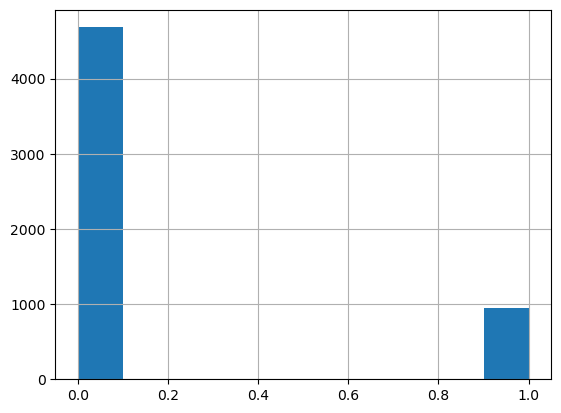

<Figure size 640x480 with 0 Axes>

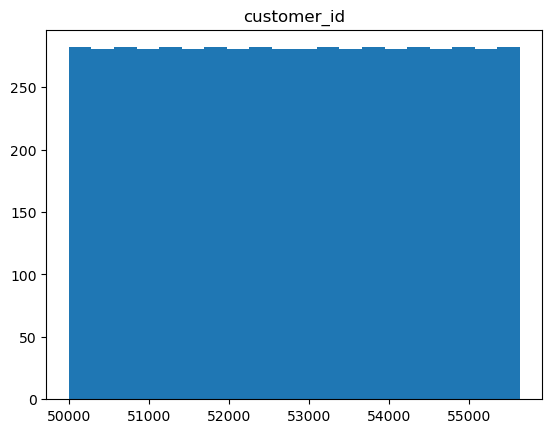

<Figure size 640x480 with 0 Axes>

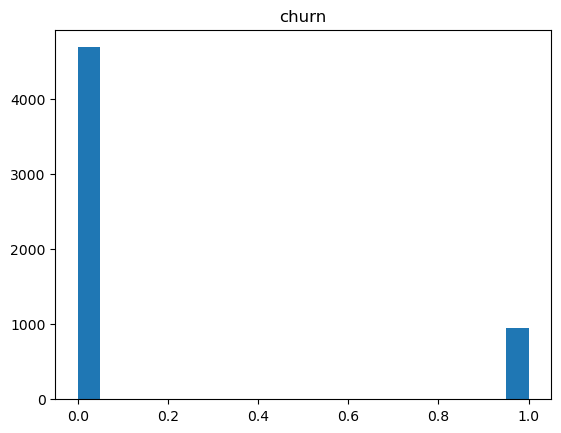

<Figure size 640x480 with 0 Axes>

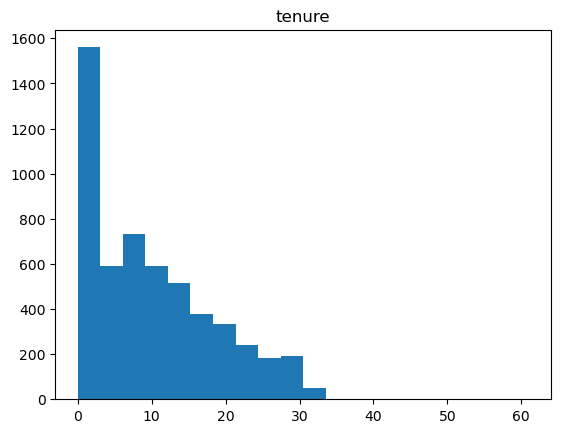

<Figure size 640x480 with 0 Axes>

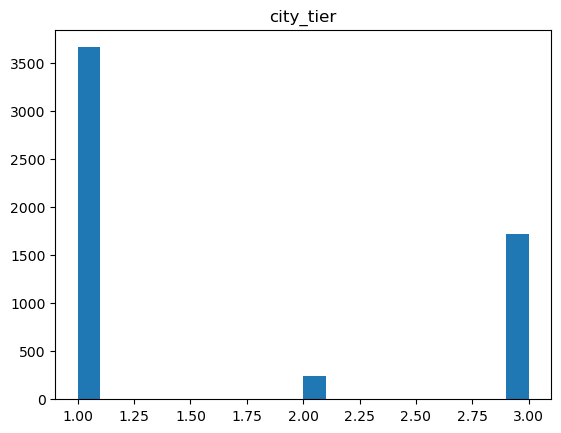

<Figure size 640x480 with 0 Axes>

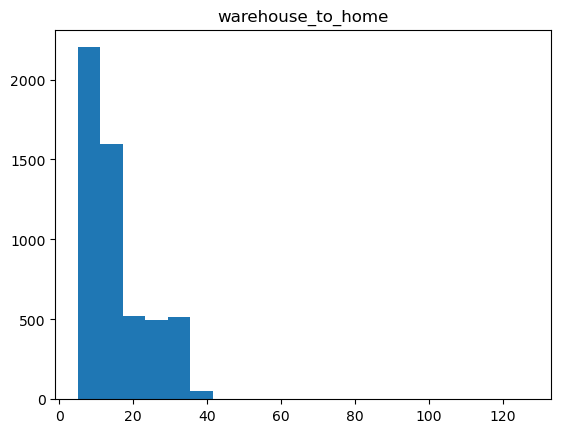

<Figure size 640x480 with 0 Axes>

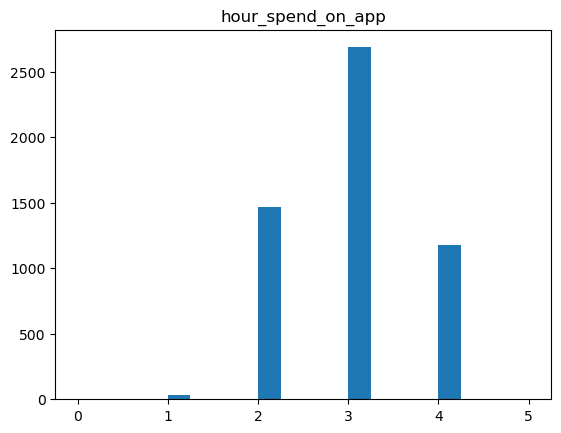

<Figure size 640x480 with 0 Axes>

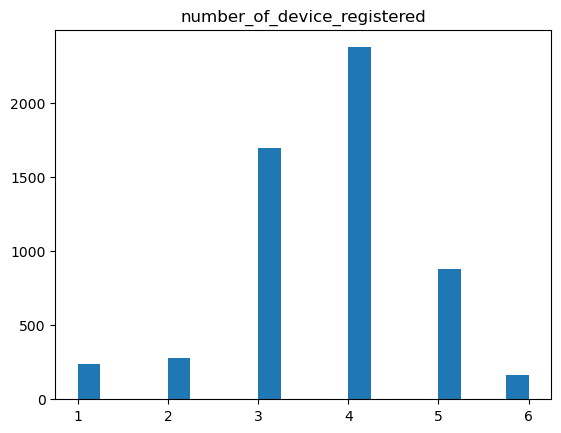

<Figure size 640x480 with 0 Axes>

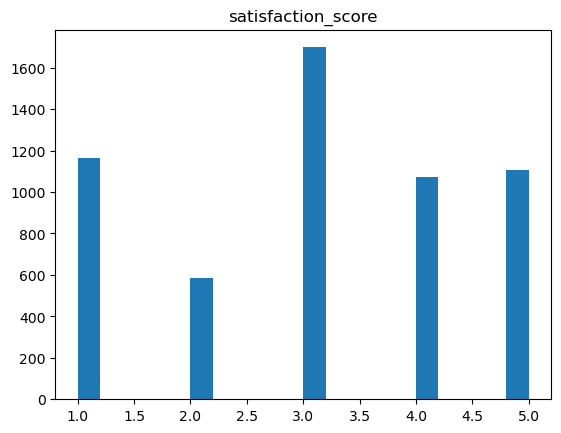

<Figure size 640x480 with 0 Axes>

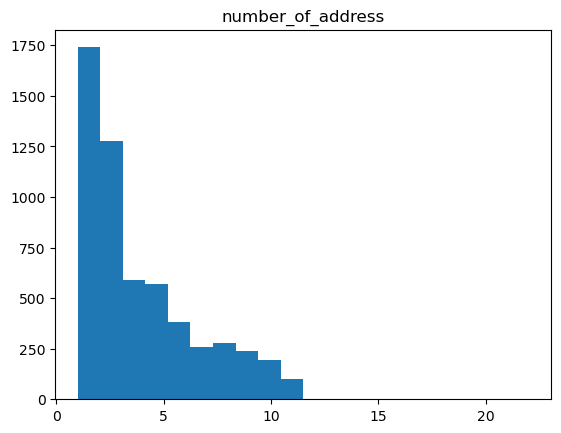

<Figure size 640x480 with 0 Axes>

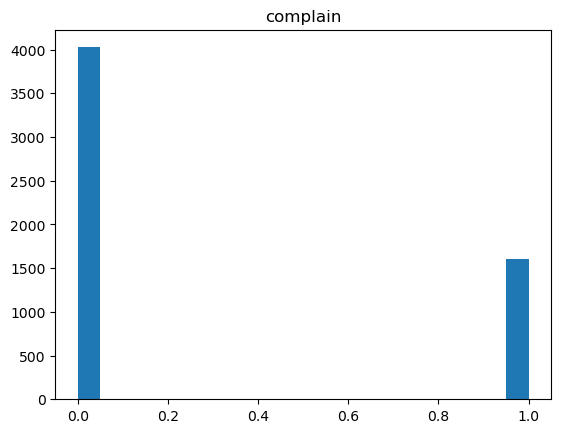

<Figure size 640x480 with 0 Axes>

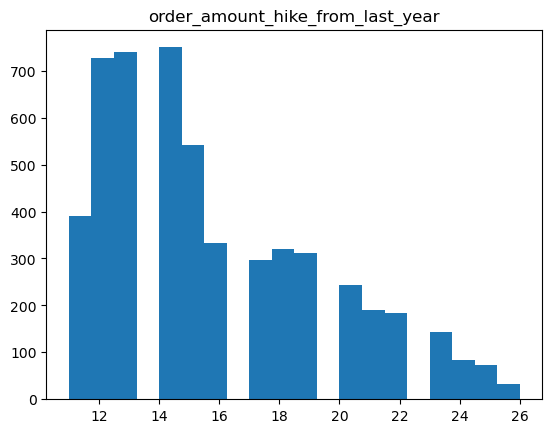

<Figure size 640x480 with 0 Axes>

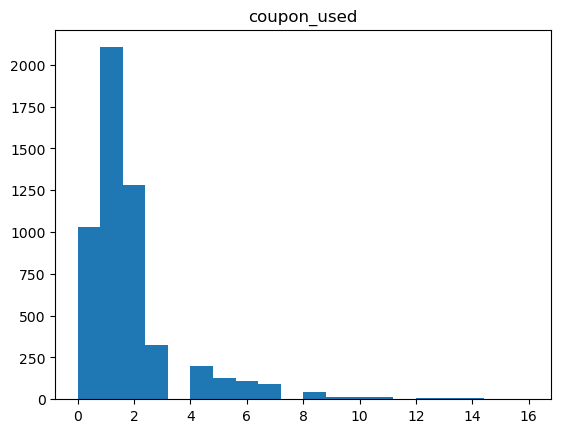

<Figure size 640x480 with 0 Axes>

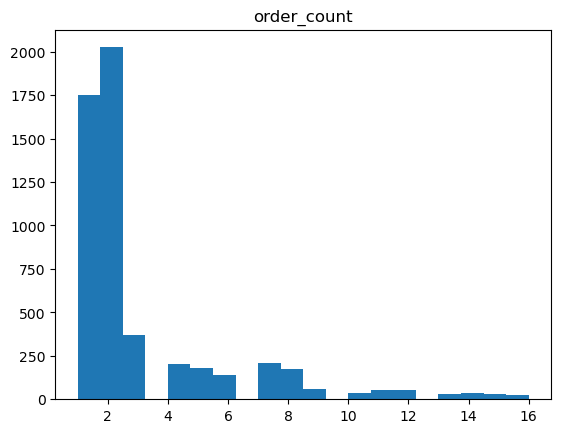

<Figure size 640x480 with 0 Axes>

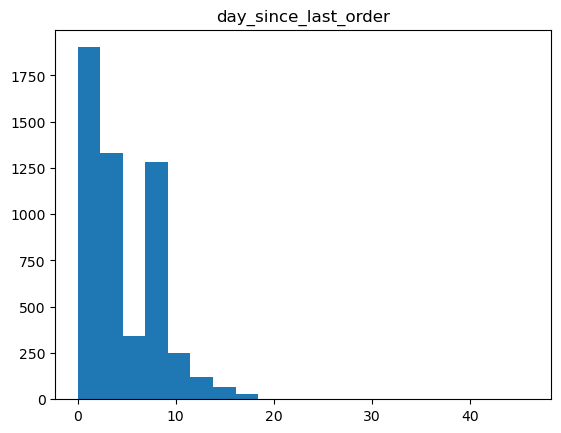

<Figure size 640x480 with 0 Axes>

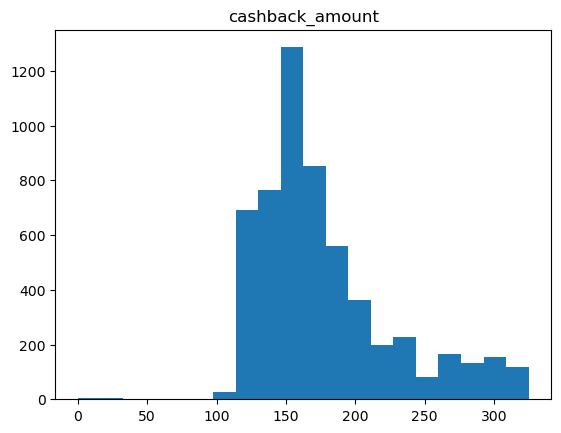

In [29]:
data = explore_data(data)

In [55]:
# Function for NaN-values checking

def nan_values_checking(data):
    
    columns_with_nan_values = data.isna().sum().reset_index()
    columns_with_nan_values = columns_with_nan_values.rename(columns={"index": "column", 0: "nan_values"})
    columns_with_nan_values = columns_with_nan_values[columns_with_nan_values['nan_values'] > 0]
    columns_with_nan_values.head()
    
    for column in columns_with_nan_values['column']:
        display(column)
        display(data[column].isna().sum())
        display(data[column].unique())
        plt.figure()
        fig,ax = plt.subplots()
        ax.set_title(column)
        plt.hist(data[column], bins=20)
        plt.show()

'tenure'

264

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

<Figure size 640x480 with 0 Axes>

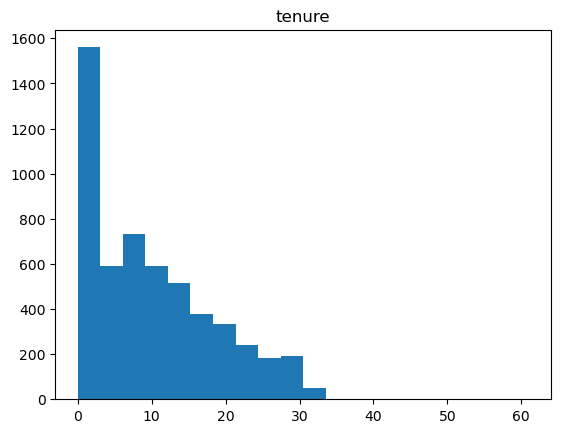

'warehouse_to_home'

251

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

<Figure size 640x480 with 0 Axes>

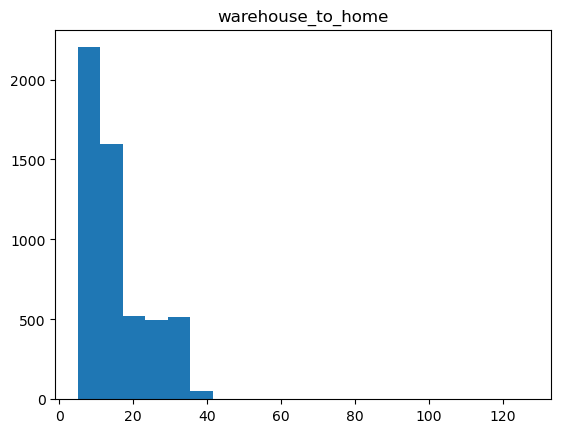

'hour_spend_on_app'

255

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

<Figure size 640x480 with 0 Axes>

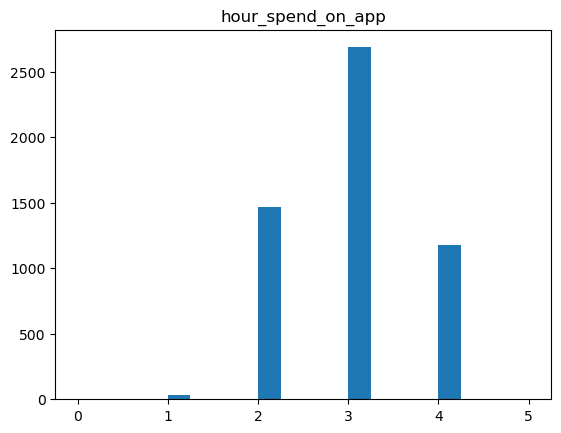

'order_amount_hike_from_last_year'

265

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

<Figure size 640x480 with 0 Axes>

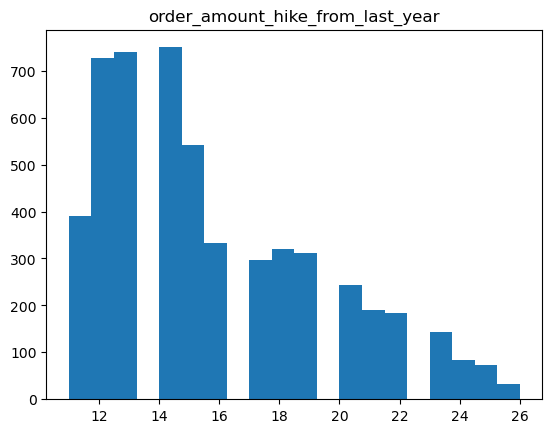

'coupon_used'

256

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

<Figure size 640x480 with 0 Axes>

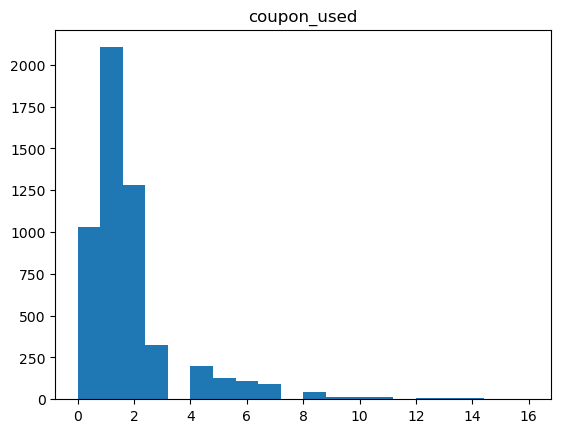

'order_count'

258

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

<Figure size 640x480 with 0 Axes>

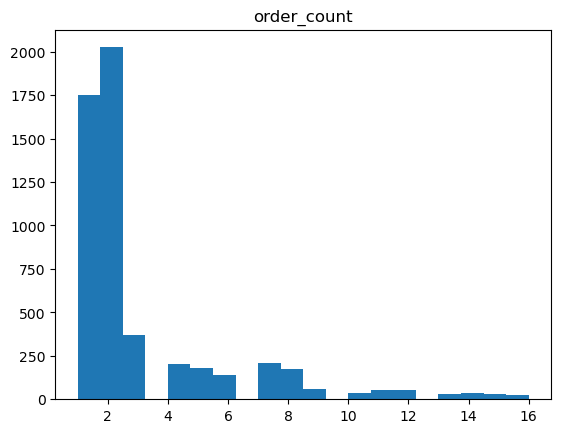

'day_since_last_order'

307

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

<Figure size 640x480 with 0 Axes>

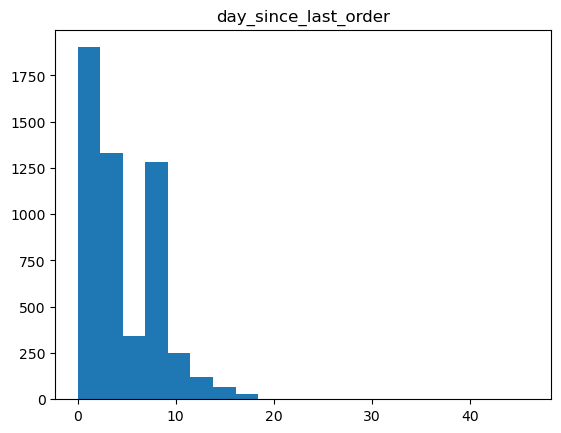

In [56]:
nan_values_checking(data)